In [98]:
import math as m
import matplotlib.pyplot as plt
from scipy import special
import numpy as np

Question 1

(a)

In [99]:
T = np.linspace(200, 400, 1000)   
#since kelvin degrees - 273.15 = celcius degrees, we 25 celsius degrees = 25 + 273.15 Kelvin degrees;

In [100]:
y = 0.1*20*m.pi*(T - (25+273.15)) + 0.1*0.8*5.67*10**(-8)*m.pi*(T**4 - (25+273.15)**4) - 100
#our f function

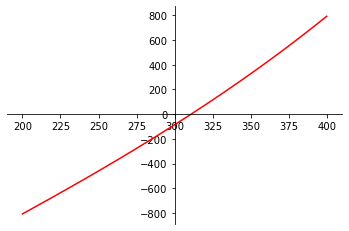

In [101]:
#create the axis and plot the function
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(T, y,'r')
plt.show()

(b)

In [102]:
# function
def f(T):
    fval = 0.1*20*m.pi*(T - (25+273.15)) + 0.1*0.8*5.67*10**(-8)*m.pi*(T**4 - (25+273.15)**4) - 100  #f function
    fderiv = 2*m.pi + 4*0.08*5.67*10**-8*m.pi * T**3;   #f derivative 
    return fval, fderiv

In [103]:
# Bisection Method
def bisection(f, a, b, tolx = 1.e-7, tolf = 1.e-7, maxit = 100 ): 
    '''Approximate solution of f(x)=0 on interval [a,b] by bisection method.
 
    Parameters
    ----------
    f : function
        Function for which we wan to to find a root.
        The call f(x)  should return the value or the value, derivative
    a,b : numbers
        Interval in which to search for a solution. bisection returns
        None if f(a)*f(b) >= 0 since a solution is not guaranteed.
    tolx : number (optional, default = 1.e-7)
        Algorithm stops when | a - b | < tolx
    tolf : number (optional, default = 1.e-7)
        Algorithm stops when | f(0.5*(a+b)) | < tolf
    maxit: integer (optional, default = 100)
        maximjm number of iterations
        

    Returns
    -------
    a,b : numbers
        f(a)*f(b) < 0; a root of f is located in (a, b)
    x : numbers
        0.5*(a+b) approximation of the root.
    ithist : np.array 
        iteration history; i-th row of ithist contains [it, a, b, c, fc]
    ifag : integer
        return flag
        iflag = 0   if |b-a| <= tolx, or   | f(x) | <= tolf
        iflag =  1  iteration terminated because maximum number of
                    iterations was reached. |b-a| > tolx, |f(x)| > tolf

    Matthias Heinkenschloss
    Department of Computational and Applied Mathematics
    Rice University
    August 29, 2021
    '''
    
    if b < a :
        t = a
        a = b
        b = t
    
    fa = f(a)
    fb = f(b)
    if( isinstance(fa, tuple) ):
        fa = fa[0]
    if( isinstance(fb, tuple) ):
        fb = fb[0]
        
    # check if a and b bound a root
    if fa*fb >= 0 :
        raise Exception(
         "The scalars a and b do not bound a root")
    
    it    = 0
    iflag = 0
    c = 0.5*(a+b)
    fc = f(c)
    if( isinstance(fc, tuple) ):
        fc = fc[0]
    ithist = np.array([it, a, b, c, fc])

    while( it < maxit and abs(b-a) > tolx and abs(fc) > tolf ):
        it = it+1;
        if fa*fc < 0 :
            b = c
            fb = fc
        else:
            a = c
            fa = fc

        c  = 0.5*(a+b)
        fc = f(c)
        if( isinstance(fc, tuple) ):
            fc = fc[0]
            
        ithist = np.vstack((ithist, np.array([it, a, b, c, fc]) ))

    # check why the bisection method truncated and set iflag
    if abs(b-a) > tolx and abs(fc) > tolf :
        # method truncated because maximum number of iterations reached
        iflag = 1
    
    return a, b, c, ithist, iflag
    
 

In [104]:
# run Bisection, lower bound = 200, upper bound = 400
a, b, x, ithist, iflag = bisection(f, 200, 400, tolf = 1.e-7)
print(f' Bisection method returned with iflag = {iflag:1d}')
print(' iter       a             b             c           f(c) ')
for i in np.arange(ithist.shape[0]):
    print(f' {ithist[i,0]:3.0f}  {ithist[i,1]:13.6e}  {ithist[i,2]:13.6e}  {ithist[i,3]:13.6e}  {ithist[i,4]:13.6e}')


 Bisection method returned with iflag = 0
 iter       a             b             c           f(c) 
   0   2.000000e+02   4.000000e+02   3.000000e+02  -8.555513e+01
   1   3.000000e+02   4.000000e+02   3.500000e+02   3.270200e+02
   2   3.000000e+02   3.500000e+02   3.250000e+02   1.150824e+02
   3   3.000000e+02   3.250000e+02   3.125000e+02   1.345865e+01
   4   3.000000e+02   3.125000e+02   3.062500e+02  -3.636151e+01
   5   3.062500e+02   3.125000e+02   3.093750e+02  -1.153135e+01
   6   3.093750e+02   3.125000e+02   3.109375e+02   9.434713e-01
   7   3.093750e+02   3.109375e+02   3.101562e+02  -5.298958e+00
   8   3.101562e+02   3.109375e+02   3.105469e+02  -2.179002e+00
   9   3.105469e+02   3.109375e+02   3.107422e+02  -6.180801e-01
  10   3.107422e+02   3.109375e+02   3.108398e+02   1.626168e-01
  11   3.107422e+02   3.108398e+02   3.107910e+02  -2.277513e-01
  12   3.107910e+02   3.108398e+02   3.108154e+02  -3.257217e-02
  13   3.108154e+02   3.108398e+02   3.108276e+02   6.5

The approximate steady state temperature is 310.82 Kelvin degrees.

(c)

In [105]:
# Newton's method
def newt1d(f, x, tolx = 1.e-7, tolf = 1.e-7, maxit = 100 ): 
    '''Approximate solution of f(x)=0 using Newton;t method.
    
    Parameters
    ----------
    f : function
        Function for which we wan to to find a root.
        The call f(x)  should return  value, derivative
    x : number
        Initial approximation of root
    tolx : number (optional, default = 1.e-7)
        Algorithm stops when | s | < tolx, where s = Newton step
    tolf : number (optional, default = 1.e-7)
        Algorithm stops when | f(x | < tolf
    maxit: integer (optional, default = 100)
        maximjm number of iterations
        

    Returns
    -------
    x : numbers
        approximation of the root.
    ithist : np.array 
        iteration history; i-th row of ithist contains [it, x, fx, s]
    ifag : integer
        return flag
        iflag = 0   if |b-a| <= tolx, or   | f(x) | <= tolf
        iflag =  1  iteration terminated because maximum number of
                    iterations was reached. |b-a| > tolx, |f(x)| > tolf


    Matthias Heinkenschloss
    Department of Computational and Applied Mathematics
    Rice University
    August 29, 2021
    ''' 
   
    it    = 0
    iflag = 0
    
    fx, fpx = f(x)
    s  = - fx/fpx
    ithist = np.array([it, x, fx, s])
    
    while( it < maxit and abs(s) > tolx and abs(fx) > tolf ):
        x = x+s
        fx, fpx = f(x)
        s  = - fx/fpx
        it = it+1;
        
            
        ithist = np.vstack((ithist, np.array([it, x, fx, s]) ))

    # check why the bisection method truncated and set iflag
    if abs(s) > tolx and abs(fx) > tolf :
        # bisection method truncated because maximum number of iterations reached
        iflag = 1
    
    return x, ithist, iflag
    
 

In [106]:
# run Newton's method
x, ithist, iflag = newt1d(f, 200, tolf = 1.e-7)
print(f" Newton's method returned with iflag = {iflag:1d}")
print(' iter        x           f(x)           step')
for i in np.arange(ithist.shape[0]):
    print(f' {ithist[i,0]:3.0f}  {ithist[i,1]:13.6e}  {ithist[i,2]:13.6e}  {ithist[i,3]:13.6e}')



 Newton's method returned with iflag = 0
 iter        x           f(x)           step
   0   2.000000e+02  -8.065004e+02   1.196731e+02
   1   3.196731e+02   7.144287e+01  -8.771078e+00
   2   3.109020e+02   6.599792e-01  -8.253691e-02
   3   3.108195e+02   5.629125e-05  -7.040977e-06
   4   3.108195e+02   3.410605e-13  -4.266026e-14


The approximate steady state temperature is 310.82 Kelvin degrees.

Question 3

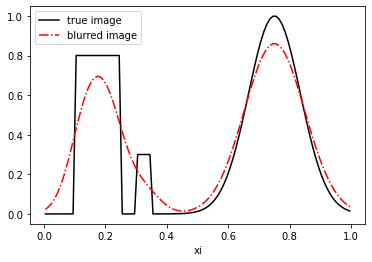

In [107]:
# specify problem
n = 100
h = 1/n
gamma = 0.05
xi = np.arange(1/2, n, dtype=float)/n
# true image
ftrue = np.exp( -(xi-0.75)**2 *70 )
ind = np.all([0.1<=xi, xi<=0.25], axis =0)  # indices for which xi in [0.1,0.25]
ftrue[ind] = 0.8
ind = np.all([0.3<=xi, xi<=0.35], axis =0)  # indices for which xi in [0.3,0.35]
ftrue[ind] = 0.3
# matrix K
C = 1/(gamma*np.sqrt(2*np.pi))
K = np.zeros((n,n))
for i in np.arange(n):
    for j in np.arange(n):
        K[i,j] = C*h* np.exp( -(xi[i]-xi[j])**2 / (2*gamma**2) )

gtrue = np.dot(K, ftrue)
                         
fig, ax = plt.subplots()
ax.plot(xi, ftrue, '-k')
ax.plot(xi, gtrue, '-.r')
ax.legend(['true image','blurred image'])
ax.set(xlabel='xi')

#fig.savefig("denoise_1d_ftrue")
plt.show()



In [108]:
# add error to true image
gerr = 0.001*np.multiply( 0.5 - np.random.uniform(0.05,0.5,n) , gtrue ) 
g = gtrue + gerr
gerror = 0.5*np.linalg.norm(gerr, 2)**2

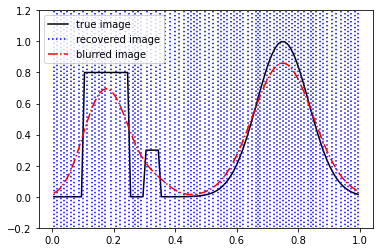

In [109]:
# naive reconstruction by solving linear system
f = np.linalg.solve(K, g)

fig, ax = plt.subplots()
ax.plot(xi, ftrue, '-k')
ax.plot(xi, f, ':b')
ax.plot(xi, gtrue, '-.r')
ax.legend(['true image','recovered image','blurred image'])
ax.set_ylim(-0.2, 1.2)

#fig.savefig("denoise_1d_frecovered2.png")
plt.show()

In [2]:
# reconstruction by solving linear least squares with fixed lambda
lam = 1.e-2
KK = np.vstack( (K, np.sqrt(lam)*np.identity(n)) )
gg = np.hstack( (g, np.zeros(n)) )
flam = np.linalg.lstsq(KK,gg,rcond=None)[0]

fig, ax = plt.subplots(2, 3, 1)
ax.plot(xi, ftrue, '-k')
ax.plot(xi, flam, ':b')
ax.plot(xi, gtrue, '-.r')
ax.legend(['true image','recovered image','blurred image'])
ax.set(xlabel='xi')
ax.set_ylim(-0.2, 1.2)

#fig.savefig("denoise_1d_frecovered2.png")
plt.show()

NameError: name 'np' is not defined

(a)

In [111]:
lam = np.logspace(-10, -2, num = 20)   #initialize our lambda
f = np.zeros(20)                       #create an array of size 20 to store the value of 0.5||Kf(lambda) - g||^2

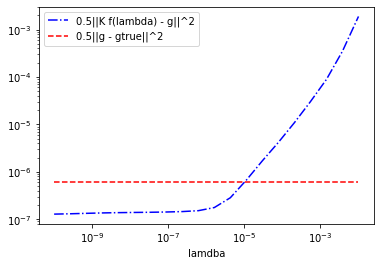

In [112]:
for i in np.arange(lam.size):
    # reconstruction by solving linear least squares with fixed lambda
    KK = np.vstack( (K, np.sqrt(lam[i])*np.identity(n)) )
    gg = np.hstack( (g, np.zeros(n)) )
    flam = np.linalg.lstsq(KK,gg,rcond=None)[0]
    f[i] = 0.5*np.linalg.norm(g - np.dot(K, flam), 2)**2

fig, ax = plt.subplots()
ax.loglog(lam, f, '-.b')
ax.loglog(lam, gerror*np.ones(20), '--r')
ax.legend(['0.5||K f(lambda) - g||^2','0.5||g - gtrue||^2'])
ax.set(xlabel='lamdba')


#fig.savefig("denoise_1d_frecovered2.png")
plt.show()

(b)

In [113]:
# function
def f(lam):
    KK = np.vstack( (K, np.sqrt(lam)*np.identity(n)) )
    gg = np.hstack( (g, np.zeros(n)) )
    flam = np.linalg.lstsq(KK,gg,rcond=None)[0]                    #f(lambda)
    fval = 0.5*np.linalg.norm(g - np.dot(K,flam), 2)**2 - gerror   #phi(lambda)
    return fval

In [114]:
# Bisection Method
def bisection(f, a, b, tolx = 1.e-7, tolf = 1.e-7, maxit = 100 ): 
    '''Approximate solution of f(x)=0 on interval [a,b] by bisection method.
 
    Parameters
    ----------
    f : function
        Function for which we wan to to find a root.
        The call f(x)  should return the value or the value, derivative
    a,b : numbers
        Interval in which to search for a solution. bisection returns
        None if f(a)*f(b) >= 0 since a solution is not guaranteed.
    tolx : number (optional, default = 1.e-7)
        Algorithm stops when | a - b | < tolx
    tolf : number (optional, default = 1.e-7)
        Algorithm stops when | f(0.5*(a+b)) | < tolf
    maxit: integer (optional, default = 100)
        maximjm number of iterations
        

    Returns
    -------
    a,b : numbers
        f(a)*f(b) < 0; a root of f is located in (a, b)
    x : numbers
        0.5*(a+b) approximation of the root.
    ithist : np.array 
        iteration history; i-th row of ithist contains [it, a, b, c, fc]
    ifag : integer
        return flag
        iflag = 0   if |b-a| <= tolx, or   | f(x) | <= tolf
        iflag =  1  iteration terminated because maximum number of
                    iterations was reached. |b-a| > tolx, |f(x)| > tolf

    Matthias Heinkenschloss
    Department of Computational and Applied Mathematics
    Rice University
    August 29, 2021
    '''
    
    if b < a :
        t = a
        a = b
        b = t
    
    fa = f(a)
    fb = f(b)
    
        
    # check if a and b bound a root
    if fa*fb >= 0 :
        raise Exception(
         "The scalars a and b do not bound a root")
    
    it    = 0
    iflag = 0
    c = 0.5*(a+b)
    fc = f(c)
    
    ithist = np.array([it, a, b, c, fc])

    while( it < maxit and abs(b-a) > tolx and abs(fc) > tolf ):
        it = it+1;
        if fa*fc < 0 :
            b = c
            fb = fc
        else:
            a = c
            fa = fc

        c  = 0.5*(a+b)
        fc = f(c)
        
            
        ithist = np.vstack((ithist, np.array([it, a, b, c, fc]) ))

    # check why the bisection method truncated and set iflag
    if abs(b-a) > tolx and abs(fc) > tolf :
        # method truncated because maximum number of iterations reached
        iflag = 1
    
    return a, b, c, ithist, iflag
    
 

In [115]:
# run Bisection, start point is 10^-2
a, b, x, ithist, iflag = bisection(f, 0, 10**-2, tolf = 1.e-7)
print(f' Bisection method returned with iflag = {iflag:1d}')
print(' iter       a             b             c           f(c) ')
for i in np.arange(ithist.shape[0]):
    print(f' {ithist[i,0]:3.0f}  {ithist[i,1]:13.6e}  {ithist[i,2]:13.6e}  {ithist[i,3]:13.6e}  {ithist[i,4]:13.6e}')


 Bisection method returned with iflag = 0
 iter       a             b             c           f(c) 
   0   0.000000e+00   1.000000e-02   5.000000e-03   5.513187e-04
   1   0.000000e+00   5.000000e-03   2.500000e-03   1.841374e-04
   2   0.000000e+00   2.500000e-03   1.250000e-03   7.446836e-05
   3   0.000000e+00   1.250000e-03   6.250000e-04   3.425151e-05
   4   0.000000e+00   6.250000e-04   3.125000e-04   1.613878e-05
   5   0.000000e+00   3.125000e-04   1.562500e-04   7.551584e-06
   6   0.000000e+00   1.562500e-04   7.812500e-05   3.553714e-06
   7   0.000000e+00   7.812500e-05   3.906250e-05   1.592293e-06
   8   0.000000e+00   3.906250e-05   1.953125e-05   5.379994e-07
   9   0.000000e+00   1.953125e-05   9.765625e-06  -2.452366e-08


Therefore, the computed root lambda* should be 9.765*10^-6.

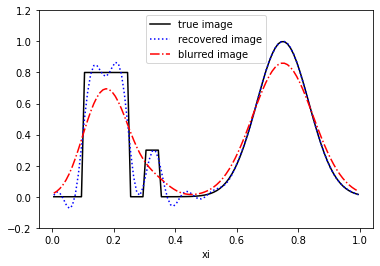

In [116]:
# reconstruction by solving linear least squares with fixed lambda
lam = 9.765625e-06
KK = np.vstack( (K, np.sqrt(lam)*np.identity(n)) )
gg = np.hstack( (g, np.zeros(n)) )
flam = np.linalg.lstsq(KK,gg,rcond=None)[0]

fig, ax = plt.subplots()
ax.plot(xi, ftrue, '-k')
ax.plot(xi, flam, ':b')
ax.plot(xi, gtrue, '-.r')
ax.legend(['true image','recovered image','blurred image'])
ax.set(xlabel='xi')
ax.set_ylim(-0.2, 1.2)

#fig.savefig("denoise_1d_frecovered2.png")
plt.show()

Question 4

(ii)

In [117]:
# reconstruction by solving linear least squares with fixed lambda
lam = 1.e-3
KK = np.vstack( (K, np.sqrt(lam)*np.identity(n)) )
gg = np.hstack( (g, np.zeros(n)) )
flam = np.linalg.lstsq(KK,gg,rcond=None)[0]
fval = 0.5*np.linalg.norm(g - np.dot(K,flam), 2)**2 - gerror

flam_der = -np.dot(np.linalg.inv(np.dot(np.transpose(K), K) + lam*np.identity(n)), flam)
f_der = np.dot(np.dot(np.transpose(np.dot(K, flam)-g), K), flam_der)

In [118]:
sigma = np.logspace(-1, -10, num = 20)     #initialize sigma
f = np.zeros(20)                           #store phi
Q = np.zeros(20)                           #store difference

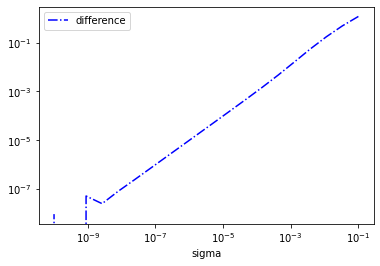

In [119]:
for i in np.arange(sigma.size):
    # reconstruction by solving linear least squares with fixed lambda
    KK1 = np.vstack( (K, np.sqrt(lam + sigma[i])*np.identity(n)) )
    gg = np.hstack( (g, np.zeros(n)) )
    flam1 = np.linalg.lstsq(KK1,gg,rcond=None)[0]
    f[i] = 0.5*np.linalg.norm(g - np.dot(K, flam1), 2)**2 - gerror
    Q[i] = (f[i] - fval)/sigma[i] - f_der

fig, ax = plt.subplots()
ax.loglog(sigma, Q, '-.b')

ax.legend(['difference'])
ax.set(xlabel='sigma')


#fig.savefig("denoise_1d_frecovered2.png")
plt.show()

(iii)

In [120]:
# reconstruction by solving linear least squares with fixed lambda
def f(x):
    
    KK2 = np.vstack( (K, np.sqrt(x)*np.identity(n)) )
    gg2 = np.hstack( (g, np.zeros(n)) )
    flam2 = np.linalg.lstsq(KK2,gg2,rcond=None)[0]
    fval2 = 0.5*np.linalg.norm(g - np.dot(K,flam2), 2)**2 - gerror

    flam_der2 = -np.dot(np.linalg.inv(np.dot(np.transpose(K), K) + x*np.identity(n)), flam2)
    fderiv = np.dot(np.dot(np.transpose(np.dot(K, flam2)-g), K), flam_der2)
    return fval2, fderiv

In [121]:
# Newton's method
def newt1d(f, x, tolx = 1.e-7, tolf = 1.e-7, maxit = 100 ): 
    '''Approximate solution of f(x)=0 using Newton;t method.
    
    Parameters
    ----------
    f : function
        Function for which we wan to to find a root.
        The call f(x)  should return  value, derivative
    x : number
        Initial approximation of root
    tolx : number (optional, default = 1.e-7)
        Algorithm stops when | s | < tolx, where s = Newton step
    tolf : number (optional, default = 1.e-7)
        Algorithm stops when | f(x | < tolf
    maxit: integer (optional, default = 100)
        maximjm number of iterations
        

    Returns
    -------
    x : numbers
        approximation of the root.
    ithist : np.array 
        iteration history; i-th row of ithist contains [it, x, fx, s]
    ifag : integer
        return flag
        iflag = 0   if |b-a| <= tolx, or   | f(x) | <= tolf
        iflag =  1  iteration terminated because maximum number of
                    iterations was reached. |b-a| > tolx, |f(x)| > tolf


    Matthias Heinkenschloss
    Department of Computational and Applied Mathematics
    Rice University
    August 29, 2021
    ''' 
   
    it    = 0
    iflag = 0
    
    fx, fpx = f(x)
    s  = - fx/fpx
    ithist = np.array([it, x, fx, s])
    
    while( it < maxit and abs(s) > tolx and abs(fx) > tolf ):
        x = x+s
        fx, fpx = f(x)
        s  = - fx/fpx
        it = it+1;
        
            
        ithist = np.vstack((ithist, np.array([it, x, fx, s]) ))

    # check why the bisection method truncated and set iflag
    if abs(s) > tolx and abs(fx) > tolf :
        # bisection method truncated because maximum number of iterations reached
        iflag = 1
    
    return x, ithist, iflag
    
 

In [122]:

# run Newton's method
x, ithist, iflag = newt1d(f, 10**-2, tolf = 1.e-7)
print(f" Newton's method returned with iflag = {iflag:1d}")
print(' iter        x           f(x)           step')
for i in np.arange(ithist.shape[0]):
    print(f' {ithist[i,0]:3.0f}  {ithist[i,1]:13.6e}  {ithist[i,2]:13.6e}  {ithist[i,3]:13.6e}')



 Newton's method returned with iflag = 0
 iter        x           f(x)           step
   0   1.000000e-02   1.885667e-03  -5.479568e-03
   1   4.520432e-03   4.650932e-04  -2.704217e-03
   2   1.816215e-03   1.185632e-04  -1.384263e-03
   3   4.319525e-04   2.295876e-05  -3.982711e-04
   4   3.368140e-05   1.311051e-06  -2.483117e-05
   5   8.850228e-06  -7.680578e-08   1.351873e-06


The computed root lambda* using Newton's method is 9.278207e-06.

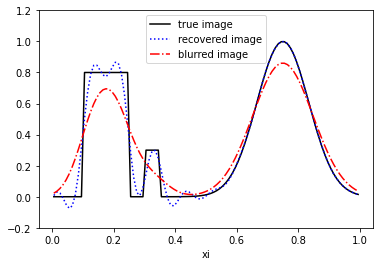

In [123]:
# reconstruction by solving linear least squares with fixed lambda
lam = 9.278207e-06
KK = np.vstack( (K, np.sqrt(lam)*np.identity(n)) )
gg = np.hstack( (g, np.zeros(n)) )
flam = np.linalg.lstsq(KK,gg,rcond=None)[0]

fig, ax = plt.subplots()
ax.plot(xi, ftrue, '-k')
ax.plot(xi, flam, ':b')
ax.plot(xi, gtrue, '-.r')
ax.legend(['true image','recovered image','blurred image'])
ax.set(xlabel='xi')
ax.set_ylim(-0.2, 1.2)

#fig.savefig("denoise_1d_frecovered2.png")
plt.show()